In [ ]:
#!pip install agentpy

In [53]:
import agentpy as ap
#import numpy as np  # Scientific computing tools
import matplotlib.pyplot as plt  # Visualization
import random
import networkx as nx
#import seaborn as sns
import IPython

In [55]:
class ConsumerAgent(ap.Agent):
    """ A consumer """
    def setup(self):
        self.ad_effectiveness = 0.01 # percentage of non-adopter who will become adopter through advertisement
        self.adoption_fraction = 0.01 # percentage of non-adopter who will become adopter after they come into contact with an adopter
        self.contact_rate = 1 # 1 contact per day
        self.is_adopter = 0 # current state is non-adopter
        self.become_adopter = False # a flag to indicate it will become an adopter (to be called during update())

    #def step(self):
    #    if self.is_adopter == 1: # is an adopter
    #        for contact in range(self.contact_rate):
    #            partner = self.neighbors().random()
    #            if random.random() < self.adoption_fraction: partner.become_adopter = True
    #    elif random.random() < self.ad_effectiveness: self.become_adopter = True

    def receive_wom(self):
        if random.random() < self.adoption_fraction: become_adopter = True
            
    def step(self):
        if random.random() < self.ad_effectiveness: self.become_adopter = True
        if self.is_adopter == 1: # is an adopter
            for contact in range(self.contact_rate):
                partner = self.neighbors().random()
                partner.receive_wom()
                
    def update(self):
        if self.is_adopter == 0:
            if self.become_adopter == True: self.is_adopter = 1

In [60]:
class MarketModel(ap.Model):
    """ A market model """
    def setup(self):
        # Prepare a small-world network
        graph = nx.watts_strogatz_graph(self.p.n_agents, self.p.n_neighbors, self.p.network_randomness)
        self.add_agents(self.p.n_agents, ConsumerAgent)
        self.add_network(graph=graph, agents=self.agents)

    def step(self):
        self.agents.step()

    def update(self):
        self.agents.update()
        n_adopters = len(self.agents.select(self.agents.is_adopter == 1))
        self.record('n_adopters', n_adopters)
        #print(n_adopters)

    def end(self):
        self.agents.record('is_adopter')

In [61]:
parameters = {
    'steps': 300,
    'n_agents': 1000,
    'n_neighbors': 2,
    'network_randomness': 0.5
}

In [62]:
model = MarketModel(parameters)
results = model.run()

Completed: 300 steps
Run time: 0:00:25.399151
Simulation finished


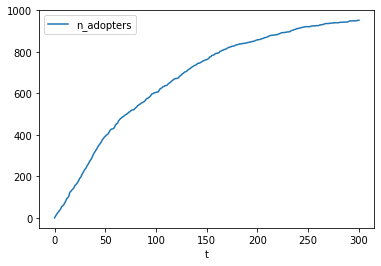

In [63]:
data = results.variables.MarketModel
ax = data.plot()

In [ ]:
def animation_plot(m, axs):
    ax1, ax2 = axs
    ax1.set_title("Adoption")
    ax2.set_title("Network")

    # Plot stackplot on first axis
    data = results.variables.MarketModel
    ax = data.plot()

    # Plot network on second axis
    nx.draw_circular(m.env.graph, node_size=50, ax=ax2)

fig, axs = plt.subplots(1, 2, figsize=(8, 4)) # Prepare figure
parameters['n_agents'] = 50 # Lower population for better visibility
animation = ap.animate(MarketModel(parameters), fig, axs, animation_plot)

In [ ]:
IPython.display.HTML(animation.to_jshtml())